# CNN with MNIST DATASET

### Import Settings

In [1]:
# have run this notebook with python 3.9.23 with tf 2.20

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
import keras
from sklearn.linear_model import LinearRegression

### Making Test,Validate and Train Sets

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
from sklearn.model_selection import train_test_split

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=(0.2), random_state=42)

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)


(48000, 28, 28, 1) (48000,) (12000, 28, 28, 1) (12000,) (10000, 28, 28, 1) (10000,)


### Model Parameters

In [ ]:


model = keras.models.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(1,(3, 3),strides=(1,1), activation='relu', padding='valid'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
"""
tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(1, (3,3), strides=(1,1), activation='relu', padding='valid', name='conv'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu', name='dense1'),
    tf.keras.layers.Dense(10, activation='softmax', name='dense2')
])"""

In [4]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train Model and Loss and Accuracy Graphs

In [5]:
def plot_loss(history):
    plt.plot(history.history['loss'],label="loss")
    plt.plot(history.history['val_loss'],label="val_loss")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("SCC")
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label="accuracy")
    plt.plot(history.history['val_accuracy'],label="val_accuracy")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

In [6]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val), verbose=0)

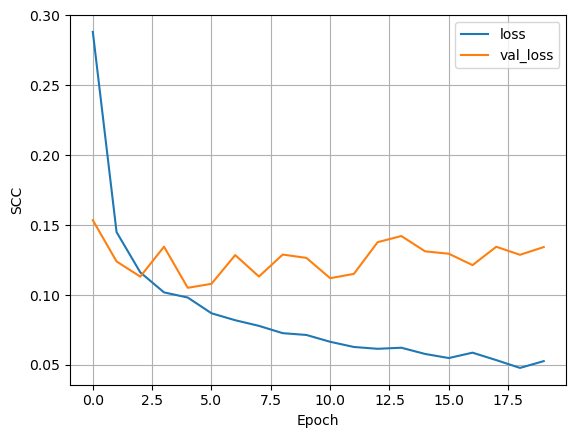

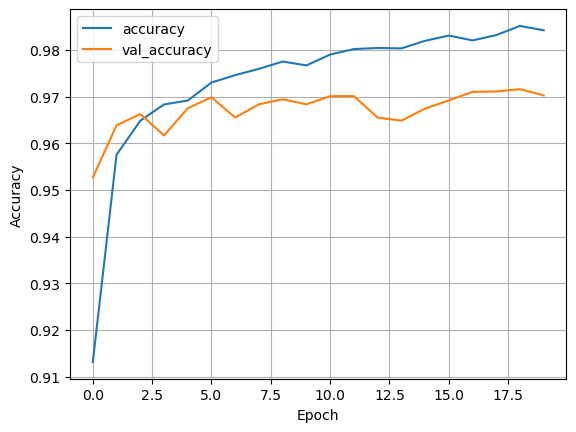

In [7]:
plot_loss(history)
plot_accuracy(history)

### Report Section

In [8]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred.argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.93      0.98      0.95       892
           6       0.99      0.96      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 169)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        10,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,902 (155.87 KB)

 Trainable params: 13,300 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,602 (103.92 KB)

### Checking what it got wrong

In [10]:
count = 0
for i in range(len(y_test)):
    if y_test[i] != y_pred[i].argmax():
        #plt.imshow(x_test[i].reshape(28, 28))
        #plt.title(f"True: {y_test[i]}, Predict: {y_pred[i].argmax()}")
        #plt.show()
        count+=1
print(count, "wrong predictions")
print("Total test samples: ", len(y_test))



311 wrong predictions
Total test samples:  10000


### Save Model & Summary

In [11]:
model.save("model.keras")
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 169)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        10,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,902 (155.87 KB)

 Trainable params: 13,300 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,602 (103.92 KB)

### Custom Tests using the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The predicted class is: 5


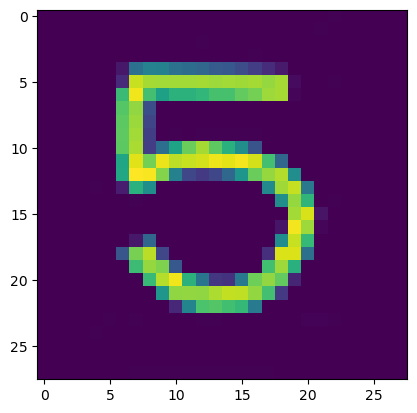

In [ ]:
from PIL import Image
image = Image.open('number_5.jpeg').convert('L')
image = image.resize((28, 28))

image_array = np.array(image)

image_array = image_array / 255.0

image_array = image_array.reshape(1, 28, 28, 1)

prediction = model.predict(image_array)
predicted_class = np.argmax(prediction)

print(f'The predicted class is: {predicted_class}')

plt.imshow(image_array.reshape(28, 28))
plt.show()

### Export Weights and Biases

In [13]:
for layer in model.layers:
        if layer.get_weights() != []:
            np.savetxt("Weights_Biases/"+layer.name + ".csv", layer.get_weights()[0].flatten(), delimiter=",")
            np.savetxt("Weights_Biases/"+layer.name + "_bias.csv", layer.get_weights()[1].flatten(), delimiter=",")

      

In [14]:
def float_to_fixed_point(value, integer_bits=2, fractional_bits=14):
    scale_factor = 2 ** fractional_bits
    max_value = (2 ** (integer_bits + fractional_bits - 1)) - 1
    min_value = -(2 ** (integer_bits + fractional_bits - 1))
    
    fixed_point_value = int(round(value * scale_factor))
    if fixed_point_value > max_value:
        fixed_point_value = max_value
    elif fixed_point_value < min_value:
        fixed_point_value = min_value
    
    return fixed_point_value

def save_fixed_point_binary(values, filename):
    with open(filename, 'w') as f:
        for value in values:
            fixed_point_value = float_to_fixed_point(value)
            binary_value = format(fixed_point_value & 0xFFFF, '016b')
            f.write(binary_value + '\n')


for layer in model.layers:
    if layer.get_weights() != []:
        weights, biases = layer.get_weights()
        
        weights_filename = f"Bin_Float_WB/{layer.name}_weights.bin"
        biases_filename = f"Bin_Float_WB/{layer.name}_biases.bin"
        
        save_fixed_point_binary(weights.flatten(), weights_filename)
        save_fixed_point_binary(biases.flatten(), biases_filename)

### To generate ZyNet Structure for just the NN part of CNN


In [15]:
import json
def to_python_floats(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, (list, tuple)):
        return [to_python_floats(x) for x in obj]
    elif isinstance(obj, (np.float32, np.float64, np.float16)):
        return float(obj)
    elif isinstance(obj, (np.int32, np.int64, np.int16, np.int8)):
        return int(obj)
    else:
        return obj

weights = []
biases = []

for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):
         continue
    if len(layer.get_weights()) == 2:
        w, b = layer.get_weights()
        # Organize weights: weights[layer][neuron][weights]
        layer_weights = [list(map(float, neuron_weights)) for neuron_weights in w.T]  # Transpose for neuron-major ordering
        weights.append(layer_weights)
        # Organize biases: biases[layer][neuron][bias]
        layer_biases = [[float(bias_val)] for bias_val in b]
        biases.append(layer_biases)

data = {"weights": to_python_floats(weights), "biases": to_python_floats(biases)}
with open("weightsandbiaseszynet.txt",'w') as f:
    json.dump(data, f)

### For Intermediate Output Generation

In [ ]:
from tensorflow.keras.models import Model
from PIL import Image
import os

def preprocess_image(img_path):
    image = Image.open(img_path).convert('L')
    image = image.resize((28, 28))
    image_array = np.array(image) / 255.0
    image_array = image_array.reshape(1, 28, 28, 1)
    return image_array

image_array = preprocess_image("number_5.jpeg")

inputs = tf.keras.Input(shape=(28, 28, 1))
x = inputs
outputs = []   # to collect outputs

for layer in model.layers:
    x = layer(x)
    outputs.append(x)

activation_model = Model(inputs=inputs, outputs=outputs)


activations = activation_model.predict(image_array)


os.makedirs('Intermediate_Outputs', exist_ok=True)
for i, activation in enumerate(activations):
    layer_name = model.layers[i].name
    filename = os.path.join('Intermediate_Outputs', f'{i+1}_{layer_name}_output.txt')
    flat_act = activation.flatten()
    np.savetxt(filename, flat_act, fmt='%s')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
